# **Data Collection & Storage — Final Project (Focused on Collection & Cleaning)**

This notebook is scoped to the first two lifecycle steps: **Data Collection** and **Data Cleaning**. The downstream analysis and communication will be completed later.

**Problematic (context for later analysis):**
- Which lines are the most well served for Parisians?
- What is the main cause of delays?
- How much does it differ from other lines?

We will only use the CSV file: `Regularities_by_liaisons_Trains_France.csv`.

---

## Principles We Follow
- Clarity and reproducibility first: every step is explained and deterministic.
- Decisions are justified using both observed data properties and data best practices.
- No ML/advanced stats here; we prepare a clean, reliable dataset for future analysis.

## 1. Data Collection

### 1.1 Dataset selection & scope
- Source: Kaggle dataset “Public transport traffic data in France” ([link](https://www.kaggle.com/datasets/gatandubuc/public-transport-traffic-data-in-france)).
- We explicitly use only one file from the dataset: `Regularities_by_liaisons_Trains_France.csv`.
- Rationale: this file contains service regularity information per liaison/line, which is directly relevant for understanding service levels and delays.

### 1.2 Provenance & reproducibility
- We retrieve data programmatically using `kagglehub` to guarantee a deterministic path and versioned download.
- We copy the CSV to a local `data/raw` folder to ensure a stable, project-local reference path for subsequent steps.
- Ethical note: data is public/open; we will cite data source in the final report and respect licensing.

### 1.3 Practical notes for this notebook
- We aim for clear, well-documented code; each decision is justified by what we observe in the data and by standard data-cleaning best practices.
- No analysis is performed here; the goal is to produce a clean, consistent, and well-typed dataset ready for downstream analysis.

In [1]:
from __future__ import annotations

import os
from pathlib import Path
import pandas as pd
import numpy as np

In [2]:
df_raw = pd.read_csv("regularite-mensuelle-tgv-aqst.csv", sep=";")
df_raw.shape

(10687, 26)

In [3]:
# just to have an idea of the data

df_raw.head(5)

,Date,Service,Gare de départ,Gare d'arrivée,Durée moyenne du trajet,Nombre de circulations prévues,Nombre de trains annulés,Commentaire annulations,Nombre de trains en retard au départ,Retard moyen des trains en retard au départ,...,Nombre trains en retard > 15min,Retard moyen trains en retard > 15 (si liaison concurrencée par vol),Nombre trains en retard > 30min,Nombre trains en retard > 60min,Prct retard pour causes externes,Prct retard pour cause infrastructure,Prct retard pour cause gestion trafic,Prct retard pour cause matériel roulant,Prct retard pour cause gestion en gare et réutilisation de matériel,"Prct retard pour cause prise en compte voyageurs (affluence, gestions PSH, correspondances)"
0,2018-01,National,GRENOBLE,PARIS LYON,183,245,0,NaN,37,8.027027,...,25,6.123741,13,6,17.647059,52.941176,0.000000,23.529412,5.882353,0.000000
1,2018-01,International,PARIS LYON,ITALIE,394,94,0,NaN,27,11.261728,...,22,11.601064,15,6,33.333333,19.047619,23.809524,14.285714,9.523810,0.000000
2,2018-01,National,MARSEILLE ST CHARLES,LYON PART DIEU,106,557,7,NaN,133,6.978195,...,40,5.195333,19,5,23.076923,23.076923,19.230769,23.076923,3.846154,7.692308
3,2018-01,National,PARIS NORD,DUNKERQUE,116,271,3,NaN,46,11.236594,...,18,3.738806,9,4,35.714286,28.571429,7.142857,25.000000,3.571429,0.000000
4,2018-01,National,ANNECY,PARIS LYON,224,198,0,NaN,12,8.070833,...,38,8.552525,14,5,23.809524,42.857143,9.523810,14.285714,4.761905,4.761905


In [4]:
# Column names
print("\nColumn names (original):\n", list(df_raw.columns))

# Information about data types and non-null counts
print("\nInfo:")
df_raw.info()


Column names (original):
 ['Date', 'Service', 'Gare de départ', "Gare d'arrivée", 'Durée moyenne du trajet', 'Nombre de circulations prévues', 'Nombre de trains annulés', 'Commentaire annulations', 'Nombre de trains en retard au départ', 'Retard moyen des trains en retard au départ', 'Retard moyen de tous les trains au départ', 'Commentaire retards au départ', "Nombre de trains en retard à l'arrivée", "Retard moyen des trains en retard à l'arrivée", "Retard moyen de tous les trains à l'arrivée", "Commentaire retards à l'arrivée", 'Nombre trains en retard > 15min', 'Retard moyen trains en retard > 15 (si liaison concurrencée par vol)', 'Nombre trains en retard > 30min', 'Nombre trains en retard > 60min', 'Prct retard pour causes externes', 'Prct retard pour cause infrastructure', 'Prct retard pour cause gestion trafic', 'Prct retard pour cause matériel roulant', 'Prct retard pour cause gestion en gare et réutilisation de matériel', 'Prct retard pour cause prise en compte voyageurs (aff

In [5]:
# Statistical summary

df_raw.describe(include='all')

,Date,Service,Gare de départ,Gare d'arrivée,Durée moyenne du trajet,Nombre de circulations prévues,Nombre de trains annulés,Commentaire annulations,Nombre de trains en retard au départ,Retard moyen des trains en retard au départ,...,Nombre trains en retard > 15min,Retard moyen trains en retard > 15 (si liaison concurrencée par vol),Nombre trains en retard > 30min,Nombre trains en retard > 60min,Prct retard pour causes externes,Prct retard pour cause infrastructure,Prct retard pour cause gestion trafic,Prct retard pour cause matériel roulant,Prct retard pour cause gestion en gare et réutilisation de matériel,"Prct retard pour cause prise en compte voyageurs (affluence, gestions PSH, correspondances)"
count,10687,10687,10687,10687,10687.000000,10687.000000,10687.000000,0.0,10687.000000,10687.000000,...,10687.000000,10687.000000,10687.000000,10687.000000,10687.000000,10687.000000,10687.000000,10687.000000,10687.000000,10687.000000
unique,87,2,59,59,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-01,National,PARIS LYON,PARIS LYON,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,130,9389,2170,2170,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,170.401516,269.288294,9.285393,NaN,86.747263,11.951464,...,26.074202,35.010654,12.485075,4.665949,21.724222,21.951504,20.004786,18.960105,7.250769,7.628965
std,NaN,NaN,NaN,NaN,87.802397,181.478061,23.652677,NaN,89.030121,11.726851,...,22.027028,19.709259,11.589545,5.322620,16.115659,15.110935,14.734253,13.635002,8.102228,9.763670
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,100.000000,149.000000,0.000000,NaN,21.000000,5.903146,...,10.000000,25.977778,4.000000,1.000000,10.526316,12.000000,10.000000,10.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,163.000000,229.000000,2.000000,NaN,53.000000,10.009368,...,21.000000,36.687500,9.000000,3.000000,19.354839,20.000000,18.181818,17.197452,5.660377,4.918033
75%,NaN,NaN,NaN,NaN,222.000000,357.000000,8.000000,NaN,127.000000,15.235088,...,36.000000,45.973760,17.000000,6.000000,30.128734,29.708615,28.070175,25.714286,10.861139,11.111111


We see here for instance that there are no negative percentages, nor percentages higher than 100, which is good and makes sense.

In [6]:
# missing values

missing = pd.DataFrame({
    'count': df_raw.isna().sum(),
    'percent': (df_raw.isna().sum() / len(df_raw)) * 100
}).sort_values('percent', ascending=False)

missing[missing['count'] > 0]

,count,percent
Commentaire annulations,10687,100.0000
Commentaire retards au départ,10687,100.0000
Commentaire retards à l'arrivée,9989,93.4687


In [7]:
# print rows where Commentaire retards au départ is not null

df_raw[df_raw['Commentaire retards au départ'].notnull()]

,Date,Service,Gare de départ,Gare d'arrivée,Durée moyenne du trajet,Nombre de circulations prévues,Nombre de trains annulés,Commentaire annulations,Nombre de trains en retard au départ,Retard moyen des trains en retard au départ,...,Nombre trains en retard > 15min,Retard moyen trains en retard > 15 (si liaison concurrencée par vol),Nombre trains en retard > 30min,Nombre trains en retard > 60min,Prct retard pour causes externes,Prct retard pour cause infrastructure,Prct retard pour cause gestion trafic,Prct retard pour cause matériel roulant,Prct retard pour cause gestion en gare et réutilisation de matériel,"Prct retard pour cause prise en compte voyageurs (affluence, gestions PSH, correspondances)"


Observations:

- Comment columns are empty or almost empty. Since we will not be using them anyways for our analysis, we will get rid of them later on.
- The rest of the columns have little to no missing value.

In [104]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_raw, title="Profiling Report")

profile.to_file("books_data.html") # Export the report to an HTML file

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 76.33it/s]


## 2. Data Cleaning

Goal: transform the raw table into a clean, consistent, analysis-ready dataset.

We will:
- Inspect schema, types, and missingness to understand the data.
- Define and justify a cleaning plan based on observations and best practices.
- Implement a transparent, deterministic cleaning pipeline that can be re-run.


### 2.2 Cleaning plan & decisions

Based on inspection and data-cleaning best practices, we will:

1) Standardize column names to `snake_case` for consistency and easier downstream use.
2) Remove exact duplicate rows to avoid double-counting.
3) Trim whitespace from textual columns and normalize casing where appropriate.
4) Parse date-like columns (e.g., containing `date`/`jour`) to datetime for reliable time operations.
5) Convert numeric-like columns currently stored as text to numeric with safe coercion.
6) Handle missing values:
   - Drop rows missing essential identifiers (e.g., liaison/line/date) if present.
   - For count-like fields (e.g., number of delays/canceled services), impute 0 only when semantically sound.
   - For categorical reason fields, set missing to `Unknown` and normalize labels.
7) Persist a clean dataset to `data/processed` (CSV and Parquet if available) for reproducibility.

We document each decision inline below and rely on column-name heuristics when the schema varies (robustness without hard-coding unknowns).

In [105]:
# Checking if there are any duplicates

num_duplicates = df_raw.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")


Number of duplicate rows: 0


In [106]:
# Deleting useless columns

df_raw = df_raw.drop(columns=['Commentaire annulations'])
df_raw = df_raw.drop(columns=['Commentaire retards au départ'])

In [107]:
# Trim whitespace in all object columns

obj_cols = [c for c in df_raw.columns if df_raw[c].dtype == "object"]
for c in obj_cols:
    df_raw[c] = df_raw[c].astype(str).str.strip()

#### Changing the format of the date column

In [108]:
df_raw["Date"] = pd.to_datetime(df_raw["Date"], format="%Y-%m")

print("new data type:", df_raw["Date"].dtype)

new data type: datetime64[ns]


In [109]:
df_raw.head()

,Date,Service,Gare de départ,Gare d'arrivée,Durée moyenne du trajet,Nombre de circulations prévues,Nombre de trains annulés,Nombre de trains en retard au départ,Retard moyen des trains en retard au départ,Retard moyen de tous les trains au départ,Nombre de trains en retard à l'arrivée,Retard moyen des trains en retard à l'arrivée,Retard moyen de tous les trains à l'arrivée,Commentaire retards à l'arrivée,Nombre trains en retard > 15min,Retard moyen trains en retard > 15 (si liaison concurrencée par vol),Nombre trains en retard > 30min,Nombre trains en retard > 60min,Prct retard pour causes externes,Prct retard pour cause infrastructure,Prct retard pour cause gestion trafic,Prct retard pour cause matériel roulant,Prct retard pour cause gestion en gare et réutilisation de matériel,"Prct retard pour cause prise en compte voyageurs (affluence, gestions PSH, correspondances)"
0,2018-01-01,National,GRENOBLE,PARIS LYON,183,245,0,37,8.027027,1.212245,23,46.314493,6.123741,Le 9760 heurte un chevreuil vers Le-Creusot-Mo...,25,6.123741,13,6,17.647059,52.941176,0.000000,23.529412,5.882353,0.000000
1,2018-01-01,International,PARIS LYON,ITALIE,394,94,0,27,11.261728,2.997695,22,55.681818,11.601064,nan,22,11.601064,15,6,33.333333,19.047619,23.809524,14.285714,9.523810,0.000000
2,2018-01-01,National,MARSEILLE ST CHARLES,LYON PART DIEU,106,557,7,133,6.978195,1.706333,60,28.920000,5.195333,nan,40,5.195333,19,5,23.076923,23.076923,19.230769,23.076923,3.846154,7.692308
3,2018-01-01,National,PARIS NORD,DUNKERQUE,116,271,3,46,11.236594,1.797637,29,28.689655,3.738806,nan,18,3.738806,9,4,35.714286,28.571429,7.142857,25.000000,3.571429,0.000000
4,2018-01-01,National,ANNECY,PARIS LYON,224,198,0,12,8.070833,0.489141,38,37.246053,8.552525,nan,38,8.552525,14,5,23.809524,42.857143,9.523810,14.285714,4.761905,4.761905


#### Outliers detection

In [110]:
# checking that 'Nombre de circulations prévues' >= 'Nombre de trains annulés'

invalid_rows = df_raw[df_raw['Nombre de circulations prévues'] < df_raw['Nombre de trains annulés']]
print(f"Number of rows where the number of scheduled trains is less than the number of cancelled trains: {len(invalid_rows)}")

print("Rows where the number of trains scheduled trains equals the number of cancelled trains:")
df_raw[df_raw['Nombre de circulations prévues'] == df_raw['Nombre de trains annulés']]

Number of rows where the number of scheduled trains is less than the number of cancelled trains: 63
Rows where the number of trains scheduled trains equals the number of cancelled trains:


,Date,Service,Gare de départ,Gare d'arrivée,Durée moyenne du trajet,Nombre de circulations prévues,Nombre de trains annulés,Nombre de trains en retard au départ,Retard moyen des trains en retard au départ,Retard moyen de tous les trains au départ,Nombre de trains en retard à l'arrivée,Retard moyen des trains en retard à l'arrivée,Retard moyen de tous les trains à l'arrivée,Commentaire retards à l'arrivée,Nombre trains en retard > 15min,Retard moyen trains en retard > 15 (si liaison concurrencée par vol),Nombre trains en retard > 30min,Nombre trains en retard > 60min,Prct retard pour causes externes,Prct retard pour cause infrastructure,Prct retard pour cause gestion trafic,Prct retard pour cause matériel roulant,Prct retard pour cause gestion en gare et réutilisation de matériel,"Prct retard pour cause prise en compte voyageurs (affluence, gestions PSH, correspondances)"
3911,2020-08-01,International,MARSEILLE ST CHARLES,MADRID,0,0,0,0,0.0,0.0,0,0.0,0.0,nan,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3977,2020-08-01,International,MADRID,MARSEILLE ST CHARLES,0,0,0,0,0.0,0.0,0,0.0,0.0,nan,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4058,2020-09-01,International,MADRID,MARSEILLE ST CHARLES,0,0,0,0,0.0,0.0,0,0.0,0.0,nan,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4062,2020-09-01,International,MARSEILLE ST CHARLES,MADRID,0,0,0,0,0.0,0.0,0,0.0,0.0,nan,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4207,2020-10-01,International,MARSEILLE ST CHARLES,MADRID,0,0,0,0,0.0,0.0,0,0.0,0.0,nan,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4243,2020-10-01,International,MADRID,MARSEILLE ST CHARLES,0,0,0,0,0.0,0.0,0,0.0,0.0,nan,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4364,2020-11-01,International,MADRID,MARSEILLE ST CHARLES,0,0,0,0,0.0,0.0,0,0.0,0.0,nan,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4388,2020-11-01,International,MARSEILLE ST CHARLES,MADRID,0,0,0,0,0.0,0.0,0,0.0,0.0,nan,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4402,2020-12-01,International,MARSEILLE ST CHARLES,MADRID,0,0,0,0,0.0,0.0,0,0.0,0.0,nan,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4451,2020-12-01,International,MADRID,MARSEILLE ST CHARLES,0,0,0,0,0.0,0.0,0,0.0,0.0,nan,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


It seems therefore that rows where 'Nombre de circulations prévues' is equal to 'Nombre de trains annulés	' are errors. Let's impute these rows with the average scheduled trains for this line.

In [111]:
# Impute rows where 'Nombre de circulations prévues' < 'Nombre de trains annulés' with the mean of 'Nombre de circulations prévues' for trains with same 'Gare de départ' and 'Gare d'arrivée' 
for index, row in invalid_rows.iterrows():
    mask = (df_raw['Gare de départ'] == row['Gare de départ']) & (df_raw['Gare d\'arrivée'] == row['Gare d\'arrivée']) & (df_raw.index != index)
    mean_value = df_raw.loc[mask, 'Nombre de circulations prévues'].mean()
    df_raw.at[index, 'Nombre de circulations prévues'] = mean_value

# Verify that there are no more invalid rows
invalid_rows_after = df_raw[df_raw['Nombre de circulations prévues'] < df_raw['Nombre de trains annulés']]
print(f"Number of invalid rows after imputation: {len(invalid_rows_after)}")

invalid_rows_after.head()

Number of invalid rows after imputation: 0


/var/folders/s9/27hvv9kd50dgj60qd6bqz1c00000gn/T/ipykernel_10715/1305666800.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '142.43023255813952' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_raw.at[index, 'Nombre de circulations prévues'] = mean_value


,Date,Service,Gare de départ,Gare d'arrivée,Durée moyenne du trajet,Nombre de circulations prévues,Nombre de trains annulés,Nombre de trains en retard au départ,Retard moyen des trains en retard au départ,Retard moyen de tous les trains au départ,Nombre de trains en retard à l'arrivée,Retard moyen des trains en retard à l'arrivée,Retard moyen de tous les trains à l'arrivée,Commentaire retards à l'arrivée,Nombre trains en retard > 15min,Retard moyen trains en retard > 15 (si liaison concurrencée par vol),Nombre trains en retard > 30min,Nombre trains en retard > 60min,Prct retard pour causes externes,Prct retard pour cause infrastructure,Prct retard pour cause gestion trafic,Prct retard pour cause matériel roulant,Prct retard pour cause gestion en gare et réutilisation de matériel,"Prct retard pour cause prise en compte voyageurs (affluence, gestions PSH, correspondances)"


In [112]:
# checking why there are still 10 rows where nb of scheduled trains is inferior to nb of cancelled trains

# check trains with 'Gare de départ' NANTES and 'Gare d'arrivée' STRASBOURG
df_raw[(df_raw['Gare de départ'] == 'NANTES') & (df_raw['Gare d\'arrivée'] == 'STRASBOURG')].head()

# check trains with 'Gare de départ' MARSEILLE ST CHARLES and 'Gare d'arrivée' TOURCOING
df_raw[(df_raw['Gare de départ'] == 'MARSEILLE ST CHARLES') & (df_raw['Gare d\'arrivée'] == 'TOURCOING')].head()

# check trains with 'Gare de départ' BORDEAUX ST JEAN and 'Gare d'arrivée' TOURCOING	
df_raw[(df_raw['Gare de départ'] == 'BORDEAUX ST JEAN') & (df_raw['Gare d\'arrivée'] == 'BORDEAUX ST JEAN')].head()

# check trains with 'Gare de départ' TOURCOING and 'Gare d'arrivée' BORDEAUX ST JEAN	
df_raw[(df_raw['Gare de départ'] == 'TOURCOING') & (df_raw['Gare d\'arrivée'] == 'BORDEAUX ST JEAN')].head()

# check trains with 'Gare de départ' MADRID and 'Gare d'arrivée' MARSEILLE ST CHARLES
df_raw[(df_raw['Gare de départ'] == 'MADRID') & (df_raw['Gare d\'arrivée'] == 'MARSEILLE ST CHARLES')].head()	

,Date,Service,Gare de départ,Gare d'arrivée,Durée moyenne du trajet,Nombre de circulations prévues,Nombre de trains annulés,Nombre de trains en retard au départ,Retard moyen des trains en retard au départ,Retard moyen de tous les trains au départ,Nombre de trains en retard à l'arrivée,Retard moyen des trains en retard à l'arrivée,Retard moyen de tous les trains à l'arrivée,Commentaire retards à l'arrivée,Nombre trains en retard > 15min,Retard moyen trains en retard > 15 (si liaison concurrencée par vol),Nombre trains en retard > 30min,Nombre trains en retard > 60min,Prct retard pour causes externes,Prct retard pour cause infrastructure,Prct retard pour cause gestion trafic,Prct retard pour cause matériel roulant,Prct retard pour cause gestion en gare et réutilisation de matériel,"Prct retard pour cause prise en compte voyageurs (affluence, gestions PSH, correspondances)"
19,2018-01-01,International,MADRID,MARSEILLE ST CHARLES,481,16.0,1,6,3.500000,1.000000,3,20.272222,7.255556,nan,3,7.255556,0,0,0.0,0.0,66.666667,33.333333,0.0,0.0
235,2018-02-01,International,MADRID,MARSEILLE ST CHARLES,481,27.0,0,13,9.384615,4.333333,5,30.843333,8.464815,nan,5,8.464815,2,0,40.0,0.0,20.000000,40.000000,0.0,0.0
298,2018-03-01,International,MADRID,MARSEILLE ST CHARLES,481,30.0,1,7,2.571429,0.241379,5,79.633333,15.576437,nan,5,15.576437,4,3,20.0,20.0,60.000000,0.000000,0.0,0.0
397,2018-04-01,International,MADRID,MARSEILLE ST CHARLES,481,24.0,17,3,1.000000,0.285714,1,73.166667,12.335714,nan,1,12.335714,1,1,0.0,0.0,0.000000,100.000000,0.0,0.0
549,2018-05-01,International,MADRID,MARSEILLE ST CHARLES,205,30.0,17,0,0.000000,0.000000,3,62.227778,16.921795,nan,3,16.921795,3,1,0.0,0.0,0.000000,0.000000,0.0,0.0


For all these liaisons which were actually in our invalid_rows dataframe but didn't get dropped, we see that the problem is that the mean nb of scheduled trains on this segment is 0. Therefore we will just drop the rows, because we don't have enough data to infer anything.

In [113]:
# drop rows where 'Nombre de circulations prévues' is 0 and 'Nombre de trains annulés' > 0

df_raw.drop(df_raw[(df_raw['Nombre de circulations prévues'] == 0) & (df_raw['Nombre de trains annulés'] > 0)].index, inplace=True)

# checking now in the raw dataset if there are still rows where 'Nombre de circulations prévues' < 'Nombre de trains annulés'
invalid_rows_final = df_raw[df_raw['Nombre de circulations prévues'] < df_raw['Nombre de trains annulés']]
print(f"Number of invalid rows after dropping inconsistent data: {len(invalid_rows_final)}")

Number of invalid rows after dropping inconsistent data: 0


Ok all good! Now what about the number of trains late at the departure? Is it lower than the number of scheduled trains?

In [119]:
df_raw[df_raw['Nombre de trains en retard au départ'] > df_raw["Nombre de circulations prévues"]].count

<bound method DataFrame.count of Empty DataFrame
Columns: [Date, Service, Gare de départ, Gare d'arrivée, Durée moyenne du trajet, Nombre de circulations prévues, Nombre de trains annulés, Nombre de trains en retard au départ, Retard moyen des trains en retard au départ, Retard moyen de tous les trains au départ, Nombre de trains en retard à l'arrivée, Retard moyen des trains en retard à l'arrivée, Retard moyen de tous les trains à l'arrivée, Commentaire retards à l'arrivée, Nombre trains en retard > 15min, Retard moyen trains en retard > 15 (si liaison concurrencée par vol), Nombre trains en retard > 30min, Nombre trains en retard > 60min, Prct retard pour causes externes, Prct retard pour cause infrastructure, Prct retard pour cause gestion trafic, Prct retard pour cause matériel roulant, Prct retard pour cause gestion en gare et réutilisation de matériel, Prct retard pour cause prise en compte voyageurs (affluence, gestions PSH, correspondances)]
Index: []>

None! That's good.

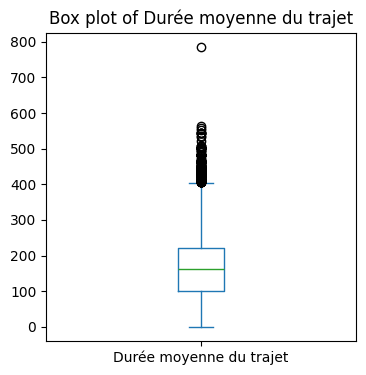

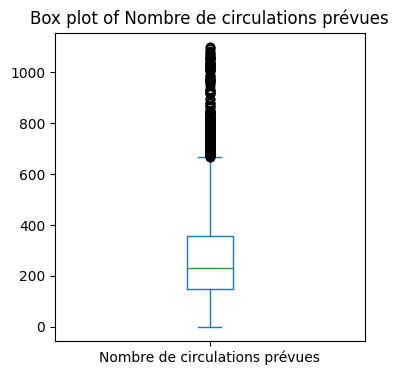

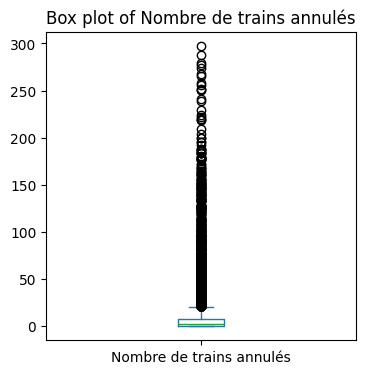

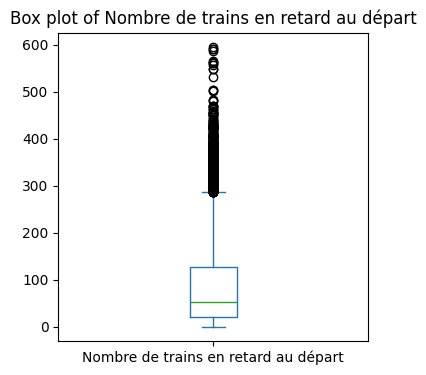

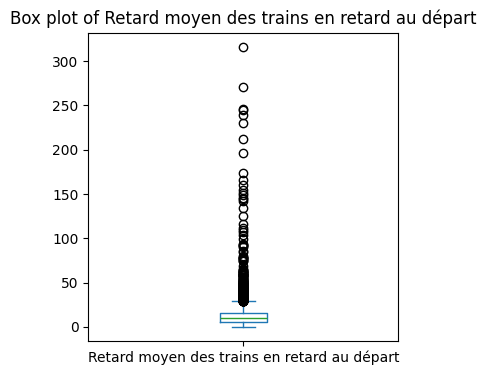

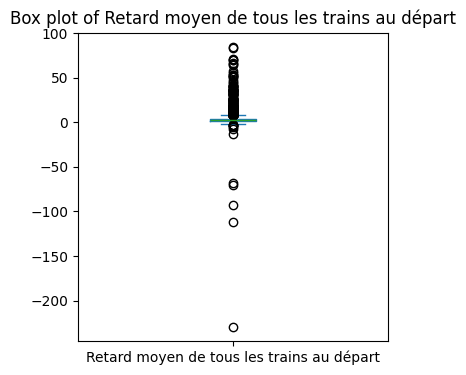

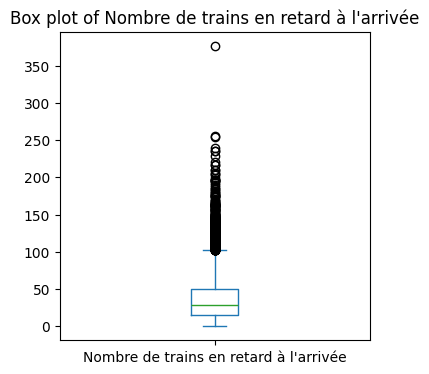

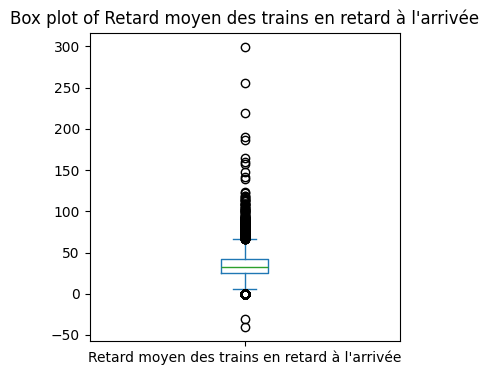

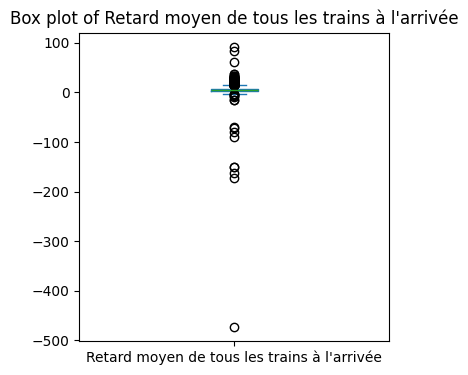

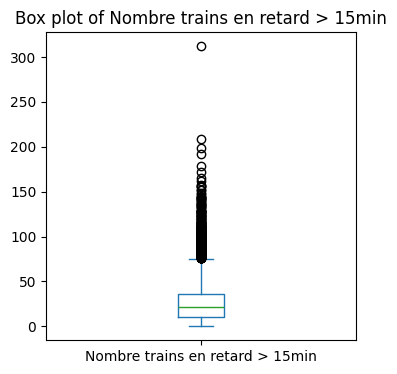

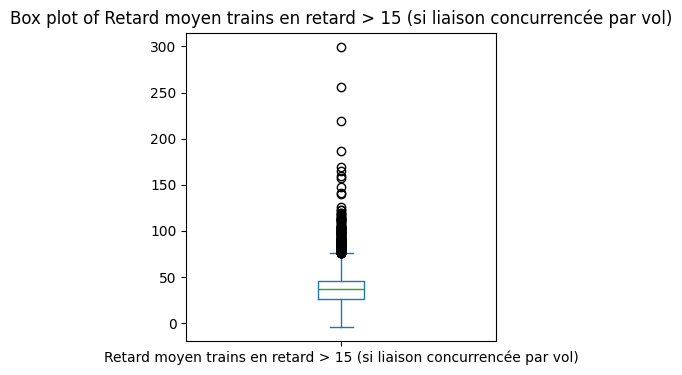

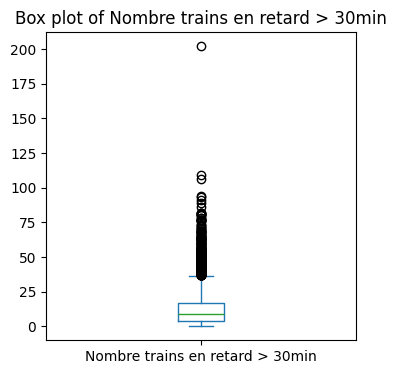

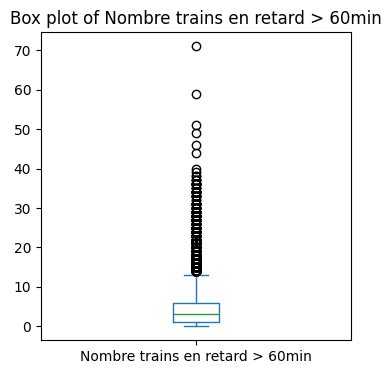

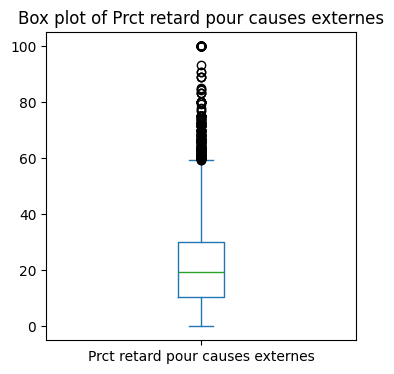

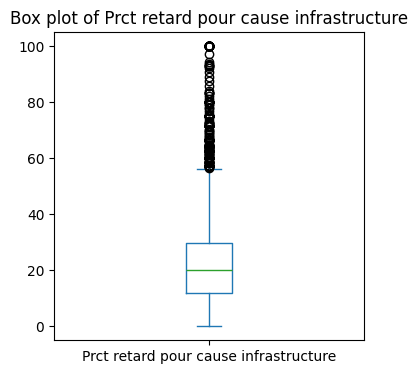

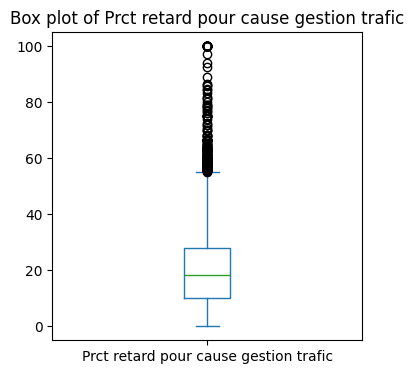

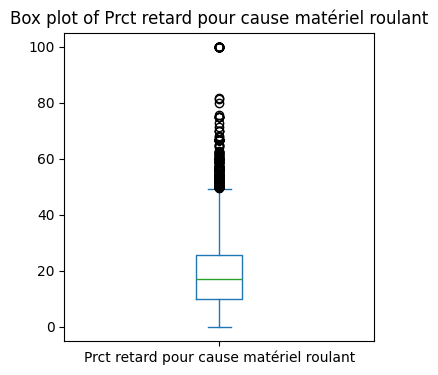

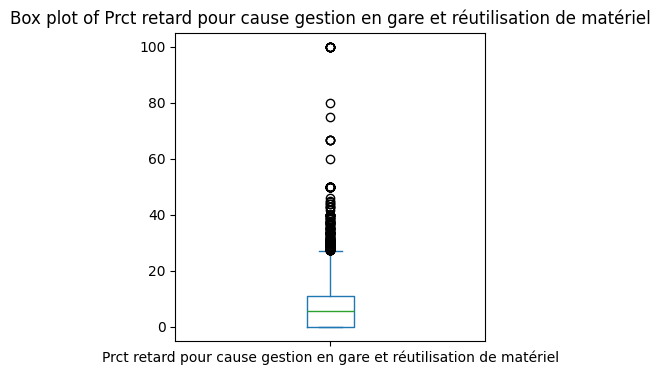

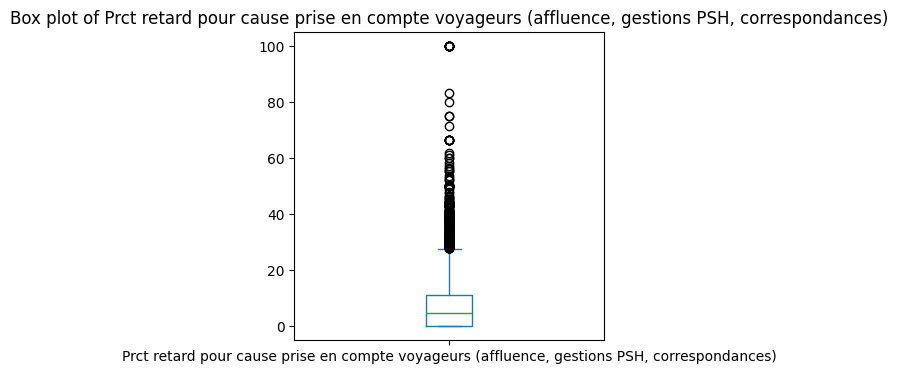

In [114]:
# plotting box plots for numerical columns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

numerical_cols = df_raw.select_dtypes(include=[np.number]).columns.tolist()

for col in numerical_cols:
    # Single column
    plt.figure(figsize=(4, 4))
    df_raw[col].plot(kind='box')
    plt.title(f'Box plot of {col}')
    plt.show()

In [ ]:
# checking the rows where 'Retard moyen de tous les trains à l'arrivée' < -30, meaning the train has more than 
# 30 minutes of advance on the schedule, which might seem a little strange.

df_raw[df_raw['Retard moyen de tous les trains à l\'arrivée'] < -30].head()

,Date,Service,Gare de départ,Gare d'arrivée,Durée moyenne du trajet,Nombre de circulations prévues,Nombre de trains annulés,Nombre de trains en retard au départ,Retard moyen des trains en retard au départ,Retard moyen de tous les trains au départ,Nombre de trains en retard à l'arrivée,Retard moyen des trains en retard à l'arrivée,Retard moyen de tous les trains à l'arrivée,Commentaire retards à l'arrivée,Nombre trains en retard > 15min,Retard moyen trains en retard > 15 (si liaison concurrencée par vol),Nombre trains en retard > 30min,Nombre trains en retard > 60min,Prct retard pour causes externes,Prct retard pour cause infrastructure,Prct retard pour cause gestion trafic,Prct retard pour cause matériel roulant,Prct retard pour cause gestion en gare et réutilisation de matériel,"Prct retard pour cause prise en compte voyageurs (affluence, gestions PSH, correspondances)"
2753,2019-10-01,National,NIMES,PARIS LYON,182,266.0,12,203,11.038095,-92.768307,70,17.233571,-90.630840,nan,51,46.835948,31,14,26.086957,43.478261,21.739130,4.347826,1.449275,2.898551
2757,2019-10-01,National,VALENCE ALIXAN TGV,PARIS LYON,137,265.0,11,221,12.704449,-67.953740,68,35.326471,-68.928084,nan,46,46.263406,28,12,25.373134,41.791045,22.388060,4.477612,2.985075,2.985075
2780,2019-10-01,National,MONTPELLIER,PARIS LYON,308,263.0,12,228,7.736330,7.012749,49,45.921429,-80.855113,nan,49,45.921429,29,13,27.083333,39.583333,20.833333,6.250000,2.083333,4.166667
2822,2019-11-01,National,VALENCE ALIXAN TGV,PARIS LYON,135,233.0,11,195,9.356325,-69.838288,51,27.172549,-71.528829,nan,35,33.845714,13,3,44.000000,24.000000,16.000000,12.000000,4.000000,0.000000
2825,2019-11-01,National,MONTPELLIER,PARIS LYON,380,227.0,11,189,4.910406,4.277469,44,-30.512500,-150.562114,nan,44,34.677381,18,3,52.272727,13.636364,15.909091,15.909091,2.272727,0.000000


We see that actually some trains in average must have left the train station with a lot of advance (1 hour and a half for Nîmes - Paris, and a bit more than one hour for Valence - Paris). Regarding Montpellier - Paris, by looking at the [SNCF's website](https://www.sncf-connect.com/train/trajet/montpellier/paris), the journey can take between 3h13 and 5h50. It's a fairly long journey and we can infer that there's more time to speed up catch up on the time lost.

So, are there actually any outliers? The delays can be positive, of course, but also negative, if the train actually arrives early.
Nothing seems strange from thses boxplots.